<h2 style="text-align: center; color: white;"><b>Financial News Analysis and Stock Price Prediction</b></h2>

<h3 style="text-align: left; color: orange;"><b>TASK 1: Exploratory Data Analysis (EDA)</b></h3>

<h5 style="text-align: left; color: yellow;"><b>Import necessary libraries</b></h5>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import spacy
import re
import yfinance as yf

<h5 style="text-align: left; color: yellow;"><b>Loading dataset</b></h5>

In [ ]:
file_path = r"C:\Users\SHAHBAZ\Desktop\reuters_headlines.csv"
reuters_df = pd.read_csv(file_path)
df = reuters_df.copy()

<h5 style="text-align: left; color: yellow;"><b>Inspect the dataset</b></h5>

In [ ]:
print("Dataset Shape:", df.shape)
print(df.info())
print(df.head())

Dataset Shape: (32770, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB
None
                                           Headlines         Time  \
0  TikTok considers London and other locations fo...  Jul 18 2020   
1  Disney cuts ad spending on Facebook amid growi...  Jul 18 2020   
2  Trail of missing Wirecard executive leads to B...  Jul 18 2020   
3  Twitter says attackers downloaded data from up...  Jul 18 2020   
4  U.S. Republicans seek liability protections as...  Jul 17 2020   

                                         Description  
0  TikTok has been in discussions with the UK gov...  
1  Walt Disney  has become the latest company to ...  
2  Former Wirecard  chief operatin

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Drop duplicates (if any)
df = df.drop_duplicates()

Number of duplicate rows: 55


In [ ]:
# Convert Time to datetime
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
print(f"Number of rows with invalid Time values: {df['Time'].isna().sum()}")

# Drop rows with invalid Time values (if necessary)
df = df.dropna(subset=['Time'])

Number of rows with invalid Time values: 0


Number of unique headlines: 32575


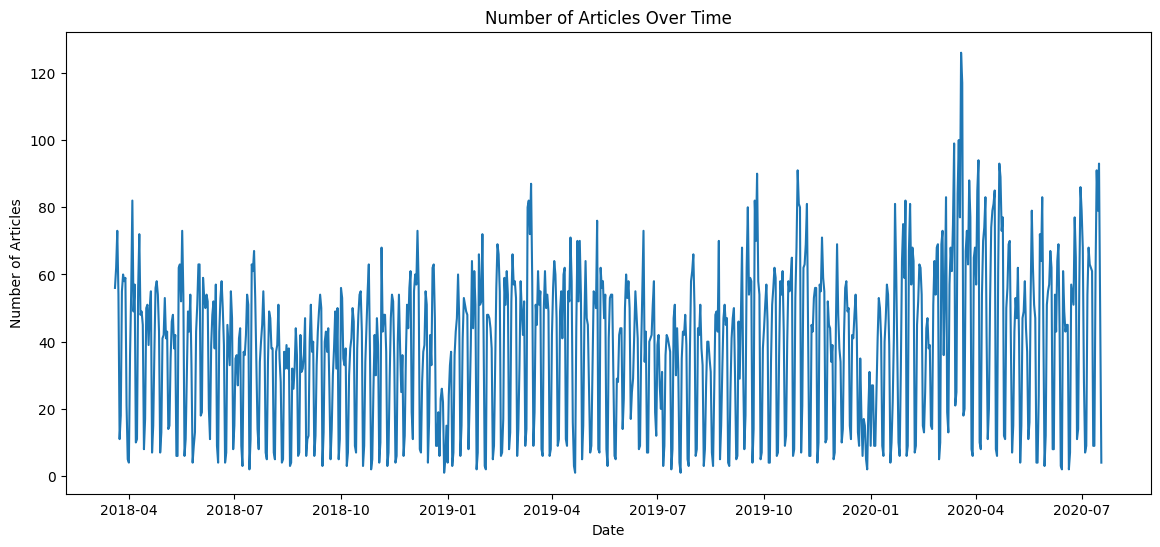

In [ ]:
# EDA: Number of unique articles
print("Number of unique headlines:", df['Headlines'].nunique())

# EDA: Article trends over time
articles_by_date = df.groupby(df['Time'].dt.date).size()
plt.figure(figsize=(14, 6))
articles_by_date.plot(kind='line', title='Number of Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

In [ ]:
# EDA: Word frequency analysis (without stopwords)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Define a function to clean and tokenize text
stop_words = set(stopwords.words('english'))

def clean_and_tokenize(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

<h5 style="text-align: left; color: yellow;"><b>Combine headlines and descriptions for pattern analysis</b></h5>

In [ ]:
combined_text = df['Headlines'] + " " + df['Description']
all_words = combined_text.apply(clean_and_tokenize).explode()

# Get the most common words
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)
print("Most common words:", common_words)

Most common words: [('us', 17796), ('said', 13710), ('trade', 6295), ('billion', 5615), ('new', 5222), ('inc', 5002), ('china', 4867), ('coronavirus', 4840), ('thursday', 4434), ('wednesday', 4389), ('tuesday', 4366), ('friday', 3824), ('monday', 3797), ('oil', 3727), ('deal', 3520), ('company', 3394), ('chief', 3148), ('united', 3055), ('says', 3023), ('trump', 3019)]


<Figure size 1400x600 with 0 Axes>

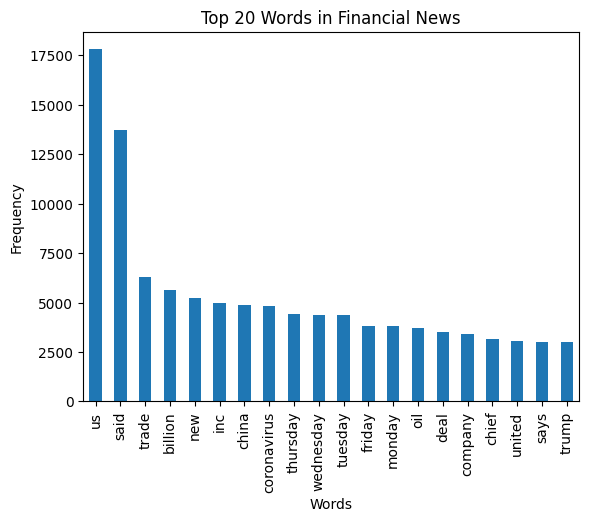

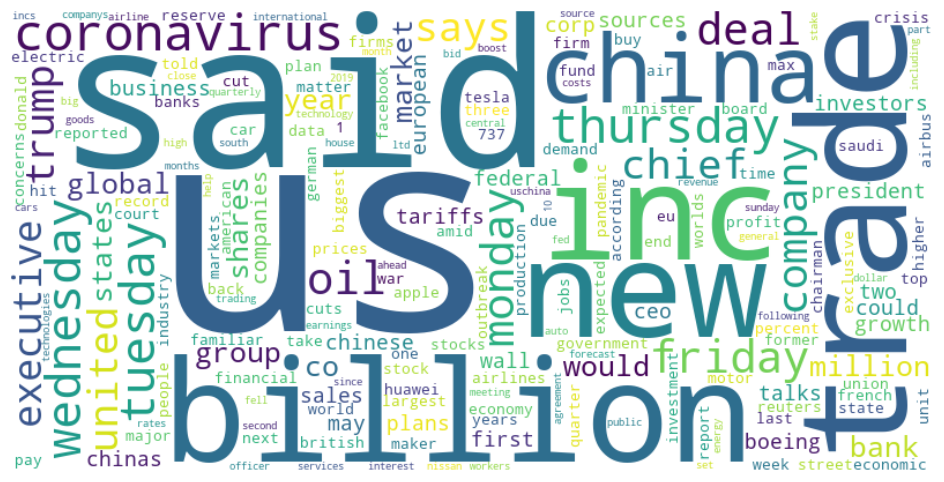

In [ ]:
# Visualize word frequencies
plt.figure(figsize=(14, 6))
pd.DataFrame(common_words, columns=['Word', 'Frequency']).set_index('Word').plot(kind='bar', legend=False)
plt.title('Top 20 Words in Financial News')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h5 style="text-align: left; color: yellow;"><b>Analysis</b></h5>
There is a strong emphasis on geopolitical and economic events with words like "trade," "billion," "deal," and "china" frequently appearing, highlighting ongoing discussions around trade agreements and economic impact. The prevalence of days of the week suggests frequent reporting on daily events, possibly indicating regular news cycles or financial reporting. The appearance of "coronavirus" indicates a significant focus on health-related news, reflecting the widespread impact of the pandemic. Additionally, the names "trump" and "united" imply coverage related to political figures and entities, pointing towards political news being a major topic of discussion.